In [10]:
import numpy as np
import pandas as pd 
import plotly.express as px
from IPython.display import display, HTML
import plotly.express as px
from plotly.subplots import make_subplots

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

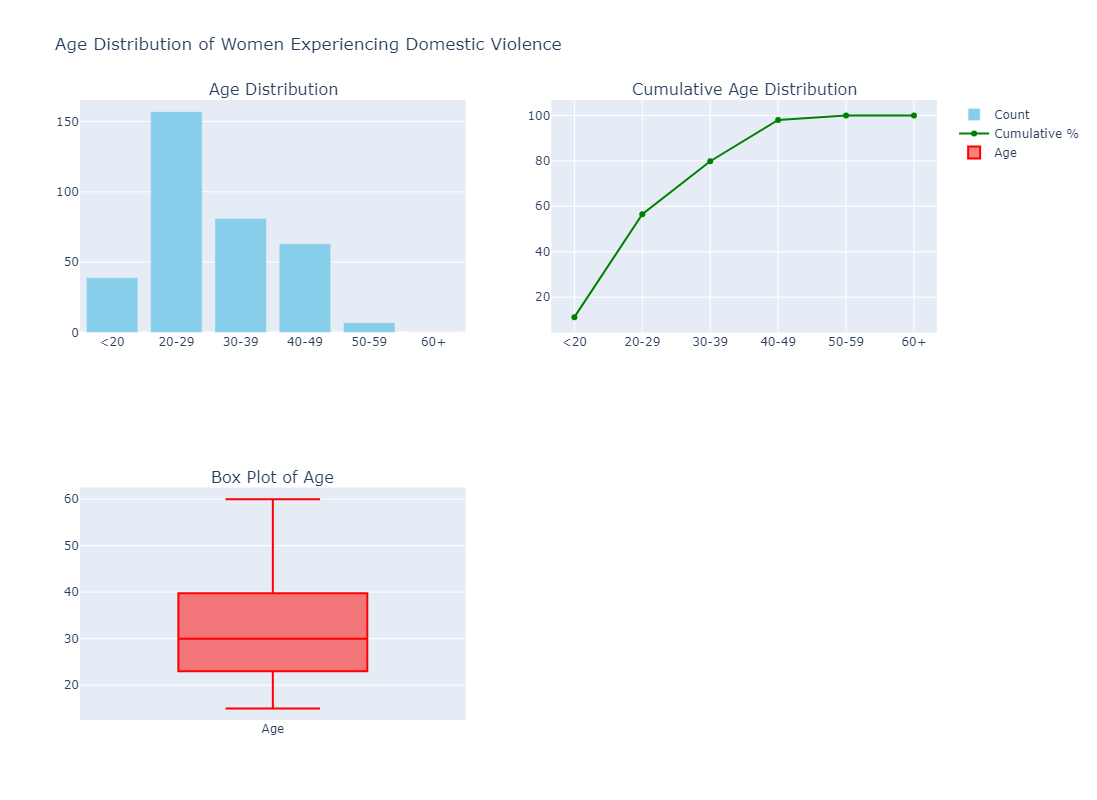

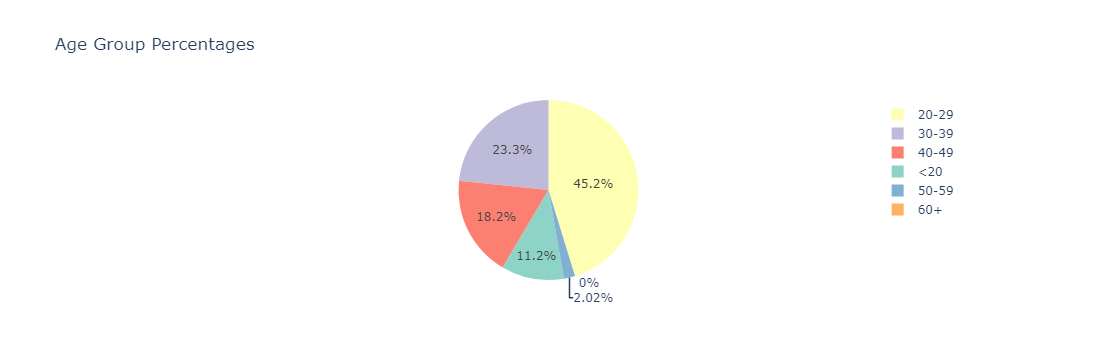


    <div style='color: blue; font-weight: bold; font-size: 20px;'>
    Insights on Age Distribution of Women Experiencing Domestic Violence:

    1. Total Cases: The dataset includes 347 reported incidents of domestic violence.
    
    2. Most Affected Age Group: Women in the 20-29 age bracket experience the highest number of cases, making up 45.2% of all reports.
    
    3. Median Age Group: The median age group is 20-29, indicating that 50% of the cases involve women younger than this group.
    
    4. Young Women at Risk: Nearly 56.5% of cases involve women aged 29 or younger, highlighting their significant vulnerability.
    
    5. Age Range: The box plot reveals the age distribution and outliers, helping identify trends among very young or older victims.

    Actionable Recommendations:

    1. Targeted Prevention Programs: Develop and implement programs specifically for the 20-29 age group to mitigate their risk.
    
    2. Early Intervention: Establish educational programs

In [12]:
# Load the dataset
df = pd.read_csv('Domestic violence.csv')

# Categorize age into groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['<20', '20-29', '30-39', '40-49', '50-59', '60+'])

# Calculate age group distribution
age_distribution = df['Age_Group'].value_counts().sort_index()

# Create subplots
fig1 = make_subplots(rows=2, cols=2, subplot_titles=('Age Distribution', 'Cumulative Age Distribution', 'Box Plot of Age'))

# Bar plot for age distribution
fig1.add_trace(go.Bar(x=age_distribution.index, y=age_distribution.values, name='Count', marker_color='skyblue'), row=1, col=1)

# Cumulative age distribution
cumulative_dist = age_distribution.cumsum() / age_distribution.sum() * 100
fig1.add_trace(go.Scatter(x=cumulative_dist.index, y=cumulative_dist.values, mode='lines+markers', name='Cumulative %', line=dict(color='green')), row=1, col=2)

# Box plot for age
fig1.add_trace(go.Box(y=df['Age'], name='Age', marker_color='red'), row=2, col=1)

# Update layout
fig1.update_layout(height=800, width=1000, title_text="Age Distribution of Women Experiencing Domestic Violence")

# Pie chart for age group percentages
fig2 = px.pie(values=age_distribution.values, names=age_distribution.index, title="Age Group Percentages")
fig2.update_traces(marker=dict(colors=px.colors.qualitative.Set3))

# Show plots
fig1.show()
fig2.show()

# Generate insights
def generate_insights(age_distribution, cumulative_dist):
    total_cases = age_distribution.sum()
    most_affected_group = age_distribution.idxmax()
    median_age_group = cumulative_dist[cumulative_dist >= 50].index[0]
    young_women_percentage = cumulative_dist['20-29']
    
    insights = f"""
    <div style='color: blue; font-weight: bold; font-size: 20px;'>
    Insights on Age Distribution of Women Experiencing Domestic Violence:

    1. Total Cases: The dataset includes {total_cases} reported incidents of domestic violence.
    
    2. Most Affected Age Group: Women in the {most_affected_group} age bracket experience the highest number of cases, making up {age_distribution[most_affected_group] / total_cases:.1%} of all reports.
    
    3. Median Age Group: The median age group is {median_age_group}, indicating that 50% of the cases involve women younger than this group.
    
    4. Young Women at Risk: Nearly {young_women_percentage:.1f}% of cases involve women aged 29 or younger, highlighting their significant vulnerability.
    
    5. Age Range: The box plot reveals the age distribution and outliers, helping identify trends among very young or older victims.

    Actionable Recommendations:

    1. Targeted Prevention Programs: Develop and implement programs specifically for the {most_affected_group} age group to mitigate their risk.
    
    2. Early Intervention: Establish educational programs in schools and colleges to teach young women about healthy relationships and the signs of abuse.
    
    3. Age-Specific Support Services: Customize support services to address the distinct needs of different age groups, with a focus on the most affected and younger women.
    
    4. Awareness Campaigns: Create and promote campaigns that resonate with all age groups, emphasizing that domestic violence affects women of all ages.
    
    5. Further Research: Conduct detailed studies to understand why certain age groups are more at risk and develop targeted strategies to address these vulnerabilities.
    
    6. Professional Training: Train healthcare providers, educators, and law enforcement personnel to recognize and respond to domestic violence across all age groups, particularly focusing on the most affected demographics.
    """
    
    return insights

# Print insights
print(generate_insights(age_distribution, cumulative_dist))



   SL. No  Age  Education  Employment  Income Marital status Violence
0       1   30  secondary  unemployed       0        married      yes
1       2   47   tertiary  unemployed       0        married       no
2       3   24   tertiary  unemployed       0       unmarred       no
3       4   22   tertiary  unemployed       0       unmarred       no
4       5   50    primary  unemployed       0        married      yes
Index(['SL. No', 'Age', 'Education', 'Employment', 'Income', 'Marital status',
       'Violence'],
      dtype='object')


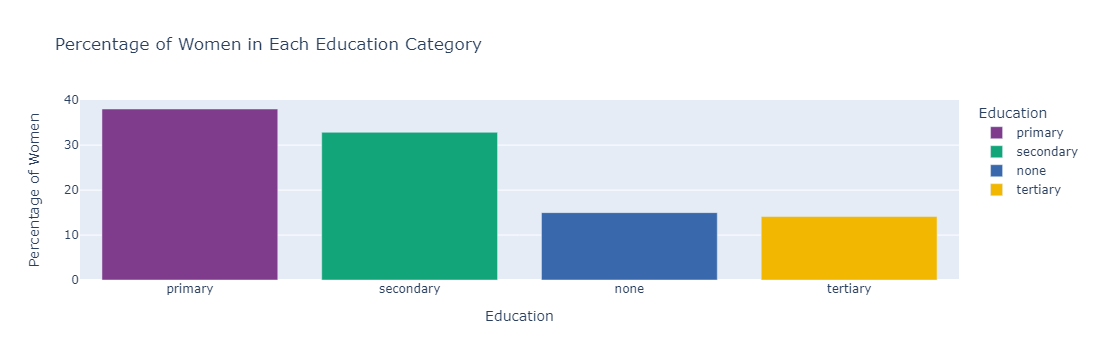

In [15]:
df.columns = [col.strip() for col in df.columns]


print(df.head())
print(df.columns)


education_counts = df['Education'].value_counts()
education_percentages = (education_counts / education_counts.sum()) * 100


fig = px.bar(education_percentages, x=education_percentages.index, y=education_percentages.values, 
             title='Percentage of Women in Each Education Category',
             labels={'x': 'Type of Education', 'y': 'Percentage of Women'},
             color=education_percentages.index,
             color_discrete_sequence=px.colors.qualitative.Bold)
fig.show()


explanation = "<div style='color: teal; font-weight: bold; font-size: 15px;'>"
explanation += "The dataset contains the following distribution of education levels among women:<br><br>"
for education, percentage in education_percentages.items():
    explanation += "- " + education + ": " + "{:.2f}".format(percentage) + "% of women<br>"
explanation += "<br>This bar plot visualizes the percentage of women in each education category. "
explanation += "It helps to understand the educational background of the women in the dataset, "
explanation += "which can be useful for further analysis and decision-making."
explanation += "</div>"


display(HTML(explanation))

   SL. No  Age  Education  Employment  Income Marital status Violence
0       1   30  secondary  unemployed       0        married      yes
1       2   47   tertiary  unemployed       0        married       no
2       3   24   tertiary  unemployed       0       unmarred       no
3       4   22   tertiary  unemployed       0       unmarred       no
4       5   50    primary  unemployed       0        married      yes
Index(['SL. No', 'Age', 'Education', 'Employment', 'Income', 'Marital status',
       'Violence'],
      dtype='object')


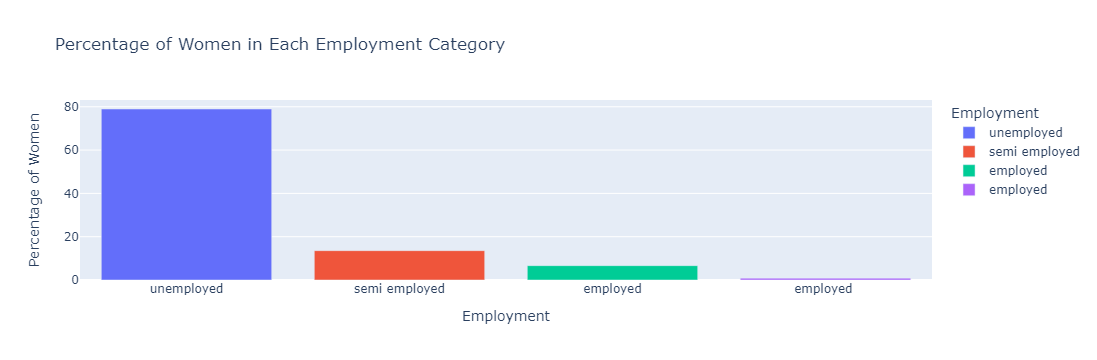

In [20]:
df.columns = [col.strip() for col in df.columns]

print(df.head())
print(df.columns)

employment_counts = df['Employment'].value_counts()
employment_percentages = (employment_counts / employment_counts.sum()) * 100

fig = px.bar(employment_percentages, x=employment_percentages.index, y=employment_percentages.values, 
             title='Percentage of Women in Each Employment Category',
             labels={'x': 'Type of Employment', 'y': 'Percentage of Women'},
              color=employment_percentages.index,
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

explanation = "<div style='color: teal; font-weight: bold; font-size: 20px;'>"
explanation += "The dataset contains the following distribution of employment levels among women:<br><br>"
for employment, percentage in employment_percentages.items():
    explanation += "- " + employment + ": " + "{:.2f}".format(percentage) + "% of women<br>"
explanation += "<br>This bar plot visualizes the percentage of women in each employment category. "
explanation += "It helps to understand the employment status of the women in the dataset, "
explanation += "which can be useful for further analysis and decision-making."
explanation += "</div>"
display(HTML(explanation))

   SL. No  Age  Education  Employment  Income Marital status Violence
0       1   30  secondary  unemployed       0        married      yes
1       2   47   tertiary  unemployed       0        married       no
2       3   24   tertiary  unemployed       0       unmarred       no
3       4   22   tertiary  unemployed       0       unmarred       no
4       5   50    primary  unemployed       0        married      yes
Index(['SL. No', 'Age', 'Education', 'Employment', 'Income', 'Marital status',
       'Violence'],
      dtype='object')


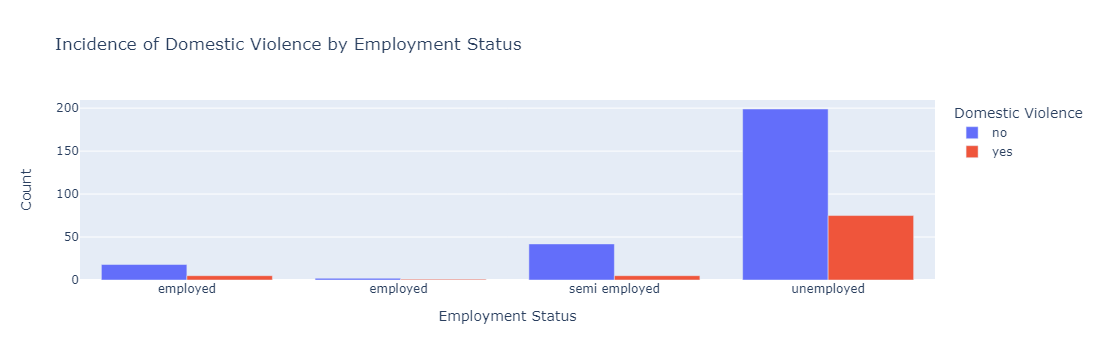

In [19]:
df.columns = [col.strip() for col in df.columns]

print(df.head())
print(df.columns)


contingency_table = pd.crosstab(df['Employment'], df['Violence'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

fig = px.bar(contingency_table, barmode='group', title='Incidence of Domestic Violence by Employment Status',
             labels={'value': 'Count', 'Employment': 'Employment Status', 'Violence': 'Domestic Violence'},
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()


explanation = "<div style='color: orange; font-weight: bold; font-size: 20px;'>"
explanation += "The relationship between employment status and the likelihood of experiencing domestic violence:<br><br>"
explanation += "A chi-square test for independence was performed to examine the relationship between employment status and the incidence of domestic violence.<br><br>"
explanation += "The chi-square statistic is {:.2f} with a p-value of {:.4f}.<br>".format(chi2, p)
if p < 0.05:
    explanation += "Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant correlation between employment status and the incidence of domestic violence.<br>"
else:
    explanation += "Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant correlation between employment status and the incidence of domestic violence.<br>"
explanation += "<br>This bar plot visualizes the incidence of domestic violence by employment status, helping to understand the relationship between employment and domestic violence."
explanation += "</div>"


display(HTML(explanation))

   SL. No  Age  Education  Employment  Income Marital status Violence
0       1   30  secondary  unemployed       0        married      yes
1       2   47   tertiary  unemployed       0        married       no
2       3   24   tertiary  unemployed       0       unmarred       no
3       4   22   tertiary  unemployed       0       unmarred       no
4       5   50    primary  unemployed       0        married      yes
Index(['SL. No', 'Age', 'Education', 'Employment', 'Income', 'Marital status',
       'Violence'],
      dtype='object')


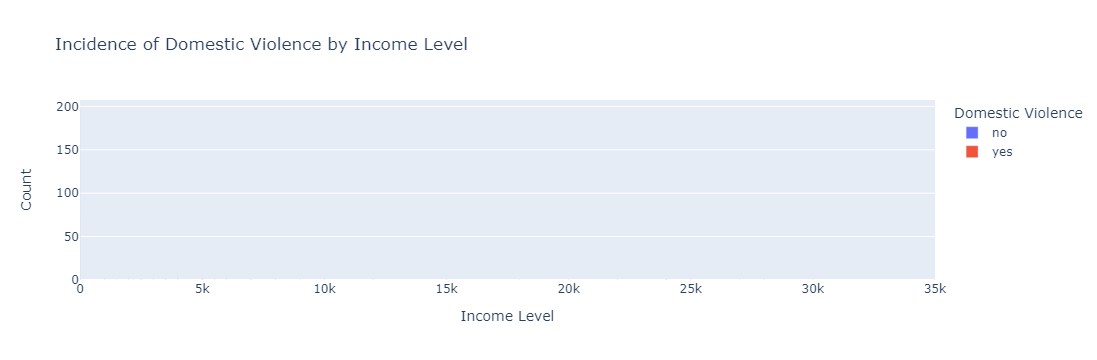

In [23]:
from scipy.stats import chi2_contingency
df.columns = [col.strip() for col in df.columns]


print(df.head())
print(df.columns)


contingency_table = pd.crosstab(df['Income'], df['Violence'])


chi2, p, dof, expected = chi2_contingency(contingency_table)


fig = px.bar(contingency_table, barmode='group', title='Incidence of Domestic Violence by Income Level',
             labels={'value': 'Count', 'Income': 'Income Level', 'Violence': 'Domestic Violence'},
             color_discrete_sequence=px.colors.qualitative.Plotly)


fig.show()
explanation = "<div style='color: teal; font-weight: bold; font-size: 20px;'>"
explanation += "The chi-square test for independence was performed to examine the relationship between income level and the incidence of domestic violence.<br><br>"
explanation += "The chi-square statistic is {:.2f} with a p-value of {:.4f}.<br>".format(chi2, p)
if p < 0.05:
    explanation += "Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant correlation between income level and the incidence of domestic violence.<br>"
else:
    explanation += "Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant correlation between income level and the incidence of domestic violence.<br>"
explanation += "<br>This bar plot visualizes the incidence of domestic violence by income level, helping to understand the relationship between income and domestic violence."
explanation += "</div>"


display(HTML(explanation))

   SL. No  Age  Education  Employment  Income Marital status Violence
0       1   30  secondary  unemployed       0        married      yes
1       2   47   tertiary  unemployed       0        married       no
2       3   24   tertiary  unemployed       0       unmarred       no
3       4   22   tertiary  unemployed       0       unmarred       no
4       5   50    primary  unemployed       0        married      yes
Index(['SL. No', 'Age', 'Education', 'Employment', 'Income', 'Marital status',
       'Violence'],
      dtype='object')


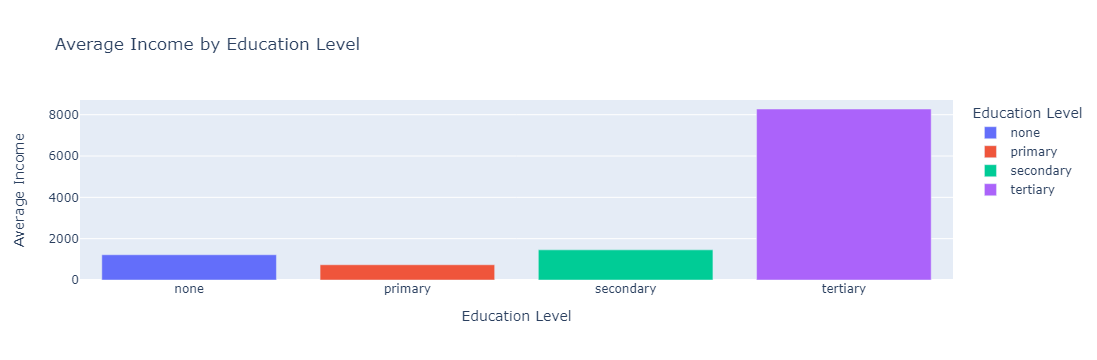

In [25]:
df.columns = [col.strip() for col in df.columns]

print(df.head())
print(df.columns)

average_income_by_education = df.groupby('Education')['Income'].mean().reset_index()


fig = px.bar(average_income_by_education, x='Education', y='Income', 
             title='Average Income by Education Level',
             labels={'Income': 'Average Income', 'Education': 'Education Level'},
             color='Education',
             color_discrete_sequence=px.colors.qualitative.Plotly)


fig.show()
explanation = "<div style='color: orange; font-weight: bold; font-size: 20px;'>"
explanation += "The bar plot above shows the average income for women at different education levels.<br><br>"
explanation += "From the plot, we can observe the following insights:<br>"
for index, row in average_income_by_education.iterrows():
    explanation += "- Women with " + row['Education'] + " have an average income of " + "{:.2f}".format(row['Income']) + ".<br>"
explanation += "<br>This information helps to understand the relationship between education level and income among women, which can be useful for policy-making and educational planning."
explanation += "</div>"


display(HTML(explanation))

   SL. No  Age  Education  Employment  Income Marital status Violence
0       1   30  secondary  unemployed       0        married      yes
1       2   47   tertiary  unemployed       0        married       no
2       3   24   tertiary  unemployed       0       unmarred       no
3       4   22   tertiary  unemployed       0       unmarred       no
4       5   50    primary  unemployed       0        married      yes
Index(['SL. No', 'Age', 'Education', 'Employment', 'Income', 'Marital status',
       'Violence'],
      dtype='object')


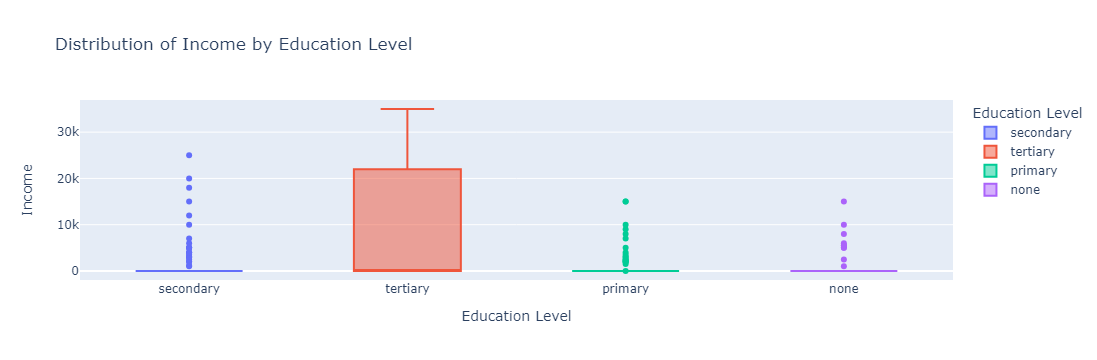

In [27]:
df.columns = [col.strip() for col in df.columns]


print(df.head())
print(df.columns)


fig = px.box(df, x='Education', y='Income', 
             title='Distribution of Income by Education Level',
             labels={'Income': 'Income', 'Education': 'Education Level'},
             color='Education',
             color_discrete_sequence=px.colors.qualitative.Plotly)


fig.show()

explanation = "<div style='color: teal; font-weight: bold; font-size: 20px;'>"
explanation += "The box plot above shows the distribution of income for women at different education levels.<br><br>"
explanation += "From the plot, we can observe the following insights:<br>"
explanation += "- The median income tends to increase with higher education levels.<br>"
explanation += "- There is a wider range of income at higher education levels, indicating more variability.<br>"
explanation += "- Women with higher education levels generally have higher incomes, but there are also outliers with lower incomes.<br>"
explanation += "<br>This information helps to understand the relationship between education level and income among women, which can be useful for policy-making and educational planning."
explanation += "</div>"


display(HTML(explanation))

   SL. No  Age  Education  Employment  Income Marital status Violence
0       1   30  secondary  unemployed       0        married      yes
1       2   47   tertiary  unemployed       0        married       no
2       3   24   tertiary  unemployed       0       unmarred       no
3       4   22   tertiary  unemployed       0       unmarred       no
4       5   50    primary  unemployed       0        married      yes
Index(['SL. No', 'Age', 'Education', 'Employment', 'Income', 'Marital status',
       'Violence'],
      dtype='object')


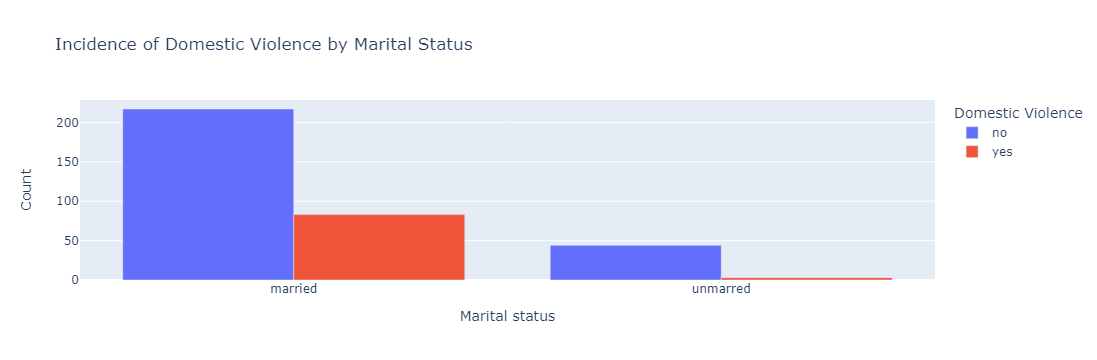

In [28]:
df.columns = [col.strip() for col in df.columns]


print(df.head())
print(df.columns)


contingency_table = pd.crosstab(df['Marital status'], df['Violence'])


chi2, p, dof, expected = chi2_contingency(contingency_table)


fig = px.bar(contingency_table, barmode='group', title='Incidence of Domestic Violence by Marital Status',
 labels={'value': 'Count', 'Marital status': 'Marital status', 'Violence': 'Domestic Violence'},
             color_discrete_sequence=px.colors.qualitative.Plotly)


fig.show()


explanation = "<div style='color: orange; font-weight: bold; font-size: 20px;'>"
explanation += "The bar plot above shows the incidence of domestic violence by marital status.<br><br>"
explanation += "From the plot, we can observe the following insights:<br>"
for index, row in contingency_table.iterrows():
    explanation += "- Women who are " + index + " have the following counts of domestic violence incidents:<br>"
    for col in contingency_table.columns:
        explanation += "  - " + col + ": " + str(row[col]) + "<br>"
explanation += "<br>The chi-square statistic is {:.2f} with a p-value of {:.4f}.<br>".format(chi2, p)
if p < 0.05:
    explanation += "Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant correlation between marital status and the incidence of domestic violence.<br>"
else:
    explanation += "Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant correlation between marital status and the incidence of domestic violence.<br>"
explanation += "<br>This bar plot visualizes the incidence of domestic violence by marital status, helping to understand the relationship between marital status and domestic violence."
explanation += "</div>"


display(HTML(explanation))

In [32]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
df.columns = [col.strip() for col in df.columns]


print(df.head())
print(df.columns)


label_encoders = {}
categorical_columns = ['Education', 'Employment', 'Marital status', 'Violence']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


X = df[['Age', 'Education', 'Employment', 'Income', 'Marital status']]
y = df['Violence']
X = sm.add_constant(X)


model = sm.Logit(y, X)
result = model.fit()


print(result.summary())


explanation = "<div style='color: teal; font-weight: bold; font-size: 20px;'>"
explanation += "The logistic regression model helps us understand the relationship between multiple factors and the likelihood of experiencing domestic violence.<br><br>"
explanation += "From the model summary, we can observe the following insights:<br>"
explanation += "- The coefficients indicate the strength and direction of the relationship between each factor and domestic violence.<br>"
explanation += "- A positive coefficient means that as the factor increases, the likelihood of experiencing domestic violence also increases.<br>"
explanation += "- A negative coefficient means that as the factor increases, the likelihood of experiencing domestic violence decreases.<br>"
explanation += "<br>Based on the model, we can identify the combination of age, education, employment, income, and marital status that correlates most strongly with domestic violence.<br>"
explanation += "</div>"

display(HTML(explanation))


   SL. No  Age  Education  Employment  Income  Marital status  Violence
0       1   30          2           3       0               0         1
1       2   47          3           3       0               0         0
2       3   24          3           3       0               1         0
3       4   22          3           3       0               1         0
4       5   50          1           3       0               0         1
Index(['SL. No', 'Age', 'Education', 'Employment', 'Income', 'Marital status',
       'Violence'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.521586
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Violence   No. Observations:                  347
Model:                          Logit   Df Residuals:                      341
Method:                           MLE   Df Model:                            5
Date:                Tue, 16 

In [31]:
df.columns = [col.strip() for col in df.columns]


print(df.head())
print(df.columns)


label_encoders = {}
categorical_columns = ['Education', 'Employment', 'Marital status', 'Violence']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    X = df[['Age', 'Education', 'Employment', 'Income', 'Marital status']]
y = df['Violence']


X = sm.add_constant(X)


model = sm.Logit(y, X)
result = model.fit()


summary = result.summary2().tables[1]
print(summary)

explanation = "<div style='color: green; font-weight: bold; font-size: 20px;'>"
explanation += "The logistic regression model provides the following insights:<br><br>"
explanation += "Coefficients and their significance:<br>"


for index, row in summary.iterrows():
    variable = index
    coefficient = row['Coef.']
    p_value = row['P>|z|']
    if p_value < 0.05:
        significance = "significant"
    else:
        significance = "not significant"
    explanation += "- {}: Coefficient = {:.4f}, p-value = {:.4f} ({})<br>".format(variable, coefficient, p_value, significance)

explanation += "<br>Conclusion:<br>"
explanation += "The logistic regression analysis reveals that certain factors have a significant correlation with the likelihood of experiencing domestic violence. These insights can be useful for policymakers and organizations working to prevent domestic violence by targeting interventions towards the most at-risk groups."
explanation += "</div>"

display(HTML(explanation))

   SL. No  Age  Education  Employment  Income Marital status Violence
0       1   30  secondary  unemployed       0        married      yes
1       2   47   tertiary  unemployed       0        married       no
2       3   24   tertiary  unemployed       0       unmarred       no
3       4   22   tertiary  unemployed       0       unmarred       no
4       5   50    primary  unemployed       0        married      yes
Index(['SL. No', 'Age', 'Education', 'Employment', 'Income', 'Marital status',
       'Violence'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.521586
         Iterations 7
                   Coef.  Std.Err.         z     P>|z|    [0.025    0.975]
const          -0.518322  1.137945 -0.455490  0.648757 -2.748654  1.712010
Age             0.031156  0.014729  2.115342  0.034401  0.002289  0.060024
Education       0.127828  0.165399  0.772848  0.439612 -0.196348  0.452005
Employment     -0.518266  0.321292 -1.613068  0.106730 -1

Columns in the dataset: Index(['SL. No', 'Age', 'Education', 'Employment', 'Income', 'Marital status',
       'Violence'],
      dtype='object')
   SL. No  Age  Education  Employment  Income Marital status Violence
0       1   30  secondary  unemployed       0        married      yes
1       2   47   tertiary  unemployed       0        married       no
2       3   24   tertiary  unemployed       0       unmarred       no
3       4   22   tertiary  unemployed       0       unmarred       no
4       5   50    primary  unemployed       0        married      yes


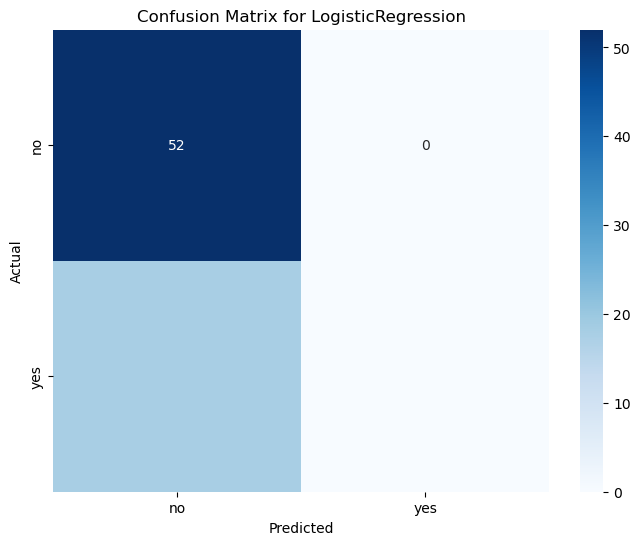

Classifier: Logistic Regression
Accuracy: 0.7429
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        52
           1       1.00      0.00      0.00        18

    accuracy                           0.74        70
   macro avg       0.87      0.50      0.43        70
weighted avg       0.81      0.74      0.63        70





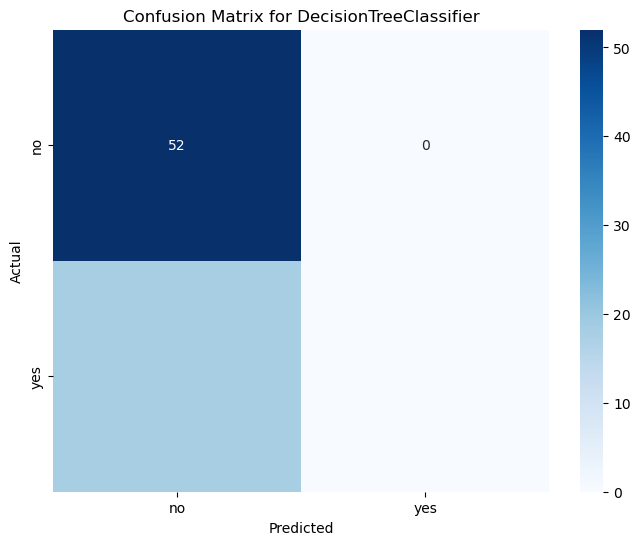

Classifier: Decision Tree
Accuracy: 0.7429
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        52
           1       1.00      0.00      0.00        18

    accuracy                           0.74        70
   macro avg       0.87      0.50      0.43        70
weighted avg       0.81      0.74      0.63        70





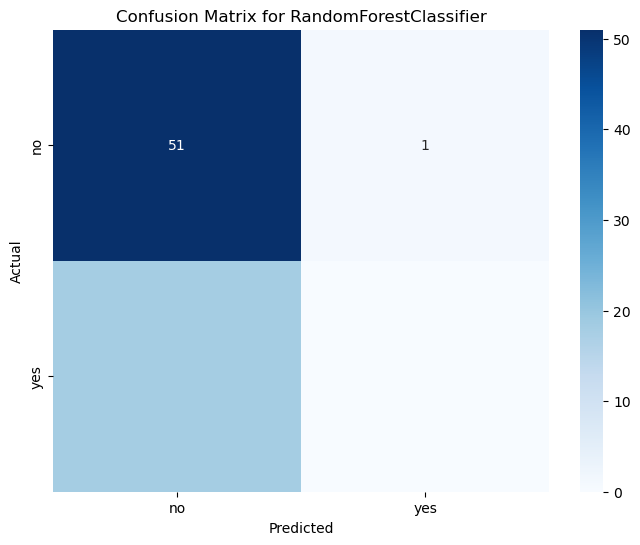

Classifier: Random Forest
Accuracy: 0.7286
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84        52
           1       0.00      0.00      0.00        18

    accuracy                           0.73        70
   macro avg       0.37      0.49      0.42        70
weighted avg       0.55      0.73      0.63        70





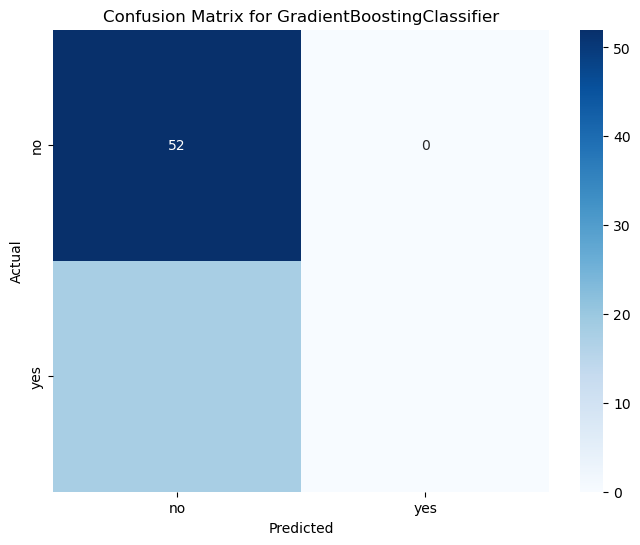

Classifier: Gradient Boosting
Accuracy: 0.7429
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        52
           1       1.00      0.00      0.00        18

    accuracy                           0.74        70
   macro avg       0.87      0.50      0.43        70
weighted avg       0.81      0.74      0.63        70





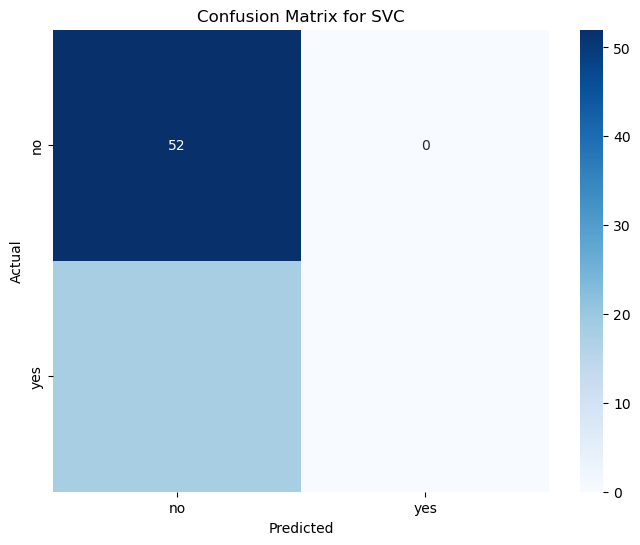

Classifier: Support Vector Machine
Accuracy: 0.7429
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        52
           1       1.00      0.00      0.00        18

    accuracy                           0.74        70
   macro avg       0.87      0.50      0.43        70
weighted avg       0.81      0.74      0.63        70





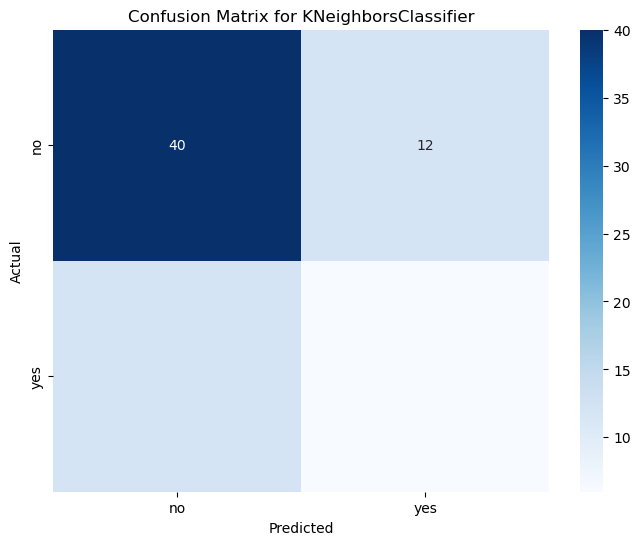

Classifier: K-Nearest Neighbors
Accuracy: 0.6571
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        52
           1       0.33      0.33      0.33        18

    accuracy                           0.66        70
   macro avg       0.55      0.55      0.55        70
weighted avg       0.66      0.66      0.66        70



Best Model After Hyperparameter Tuning:
RandomForestClassifier(min_samples_leaf=2, n_estimators=50)
Best Cross-Validated Accuracy: 0.7545


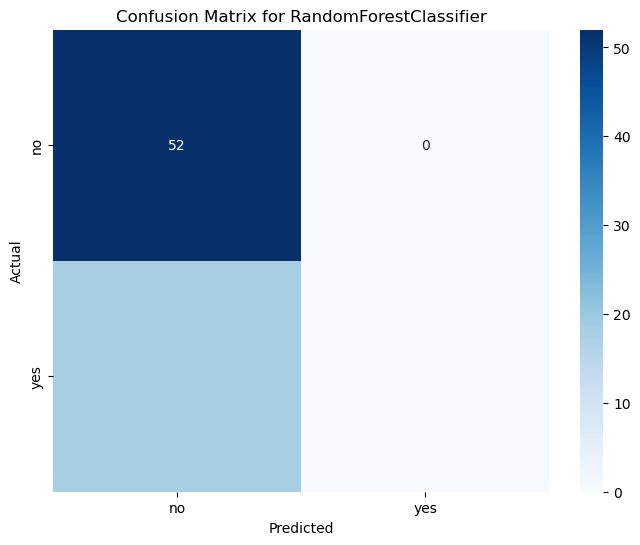

Final Model Evaluation on Test Set:
Accuracy: 0.7429
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        52
           1       1.00      0.00      0.00        18

    accuracy                           0.74        70
   macro avg       0.87      0.50      0.43        70
weighted avg       0.81      0.74      0.63        70



In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Domestic violence.csv')

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Display the columns to verify their names
print("Columns in the dataset:", df.columns)

# Example to show columns and first few rows
print(df.head())


target_column = 'Violence'  
feature_columns = ['Marital status', 'Employment', 'Education']  

# Check if the columns exist in the dataset
for col in [target_column] + feature_columns:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in the dataset")

# Handle missing values (if any)
df.dropna(subset=[target_column] + feature_columns, inplace=True)

# Encode the target variable
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

# Define features and target
X = df[feature_columns]
y = df[target_column]

# One-hot encode the categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), feature_columns)
    ],
    remainder='passthrough'
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline to include the encoding and scaling
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('scaler', StandardScaler(with_mean=False))
])

# Fit and transform the training data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Function to evaluate classifiers
def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {clf.__class__.__name__}')
    plt.show()
    
    return accuracy, report, cm

# Evaluate each classifier
for name, clf in classifiers.items():
    accuracy, report, cm = evaluate_classifier(clf, X_train, X_test, y_train, y_test)
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n" + "="*60 + "\n")

# Hyperparameter tuning for the best model (e.g., Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model after tuning
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

print("Best Model After Hyperparameter Tuning:")
print(best_model)
print(f"Best Cross-Validated Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on the test set
final_accuracy, final_report, final_cm = evaluate_classifier(best_model, X_train, X_test, y_train, y_test)
print("Final Model Evaluation on Test Set:")
print(f"Accuracy: {final_accuracy:.4f}")
print("Classification Report:")
print(final_report)
